#### Test of stuff exported from Mathematica for case "MatrixElementExport" of CommonPlatformTriple_4B4W_2x4B4W4W

## Preliminaries

In [3]:
import sys
sys.path.append('/Users/t.seetharamu.1/Documents/svn/GCIF/GCIF planning/Infrastructure cryogenics/CommonPlatformTriple_4B4W_2x4B4W4W/MatrixElementExport')

### Other system dependencies

In [4]:
import os

In [5]:
from math import pi,sqrt

In [6]:
import numpy as np

In [7]:
# import scipy.linalg

In [8]:
import control as ct

In [9]:
import matplotlib.pyplot as plt

In [10]:
import os
import pandas as pd
import inspect
from math import pi,sqrt
from decimal import Decimal

import numpy as np

# import scipy.linalg
from matplotlib.ticker import MultipleLocator
import control as ct

import matplotlib.pyplot as plt
import importlib

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18          # Default font size for text
plt.rcParams['axes.titlesize'] = 22     # Font size for axes titles
plt.rcParams['axes.labelsize'] = 18     # Font size for axes labels
plt.rcParams['xtick.labelsize'] = 14    # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14    # Font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 15    # Font size for legend


### CommonPlatformTriple_4B4W_2x4B4W4W model definition data and matrix element functions exported from Mathematica 

In [11]:
import symbexportCommonPlatformTriple_4B4W_2x4B4W4Wfull as tpmodel

### Parameters exported from Mathematica

In [12]:
import CommonPlatformTriple_4B4W_2x4B4W4W_MatrixElementExport_cptriple as tp

In [124]:
n3 = 0.0405
def reboot_params():
    importlib.reload(tp)
    tp.n0 = 0.0905
    n3 = 0.0405
    
    tp.d0 = 0.001
    tp.d1I = 0.001
    tp.d1E = 0.001
    
    tp.n2I = 0.0405
    tp.n3I = 0.0405
    tp.n4I = n3 # To meet the IM and Optic size 
    tp.n5I = n3

    tp.n2E = 0.0405
    tp.n3E = 0.0405
    tp.n4E = n3 # To meet the IM and Optic size 
    tp.n5E = n3
    
    revised_sus_length = 0.298  # to meet optical view port height
    tp.kw1= 1396.07
    tp.kw2I=tp.kw1
    tp.kw2E=tp.kw1
    tp.kw3I=186218 # These are heat extraction limited wire dia
    tp.kw3E=186218
    
    tp.l1 = revised_sus_length
    tp.l2I = revised_sus_length
    tp.l2E = revised_sus_length
    tp.l3I = revised_sus_length
    tp.l3E = revised_sus_length

In [14]:
def original_params():
    
    """
    This function loads reloads the tp class and reboots the parameters.
    """
    importlib.reload(tp)
    revised_sus_length = 0.298


    data =     [["Masses", "m1 / m2 / m3", [round(tp.m1,2) ,round(tp.m2,2) ,round(tp.m3,2)]],

    ["Roll Moment of Inertia", "I1,x / I2,x / I3,x",  [round(i,5) for i in [tp.I1x, tp.I2x , tp.I3x]]],

    ["Pitch Moment of Inertia", "I1,y / I2,y / I3,y",  [round(i,5) for i in [tp.I1y, tp.I2y , tp.I3y]]],

    ["Yaw Moment of Inertia", "I1,z / I2,z / I3,z", [round(i,5) for i in [tp.I1z, tp.I2z , tp.I3z]]],
    
            ["Stretched wire lengths", "l1 / l2 / l3", [tp.l1 , tp.l2, tp.l3]], 
            ["Upper end wire vertical attachment distance", "dtop / d1/ d3 " , [round(i,3) for i in [tp.dtop, tp.d1 , tp.d3]]],
            ["Bottom end wire vertical attachment distance", "d0 / d2 / d4" , [round(i,3) for i in [tp.d0 , tp.d2, tp.d4]]],
            
            ["Longitudinal wire separation" , "su / si / sl", [tp.su, tp.si , tp.sl]],
            ["Upper transverse wire separation", "n0 / n2 / n4 ", [tp.n0, tp.n2 , tp.n4]],
            ["Bottom transverse wire separation", "n1 / n3 / n5 ", [tp.n1, tp.n3 , tp.n5]],
            ["Vertical Spring stiffness", "kbuz / kbiz / kblz", [tp.kbuz, "NA", tp.kblz]],
            ["Wire Lengths", "l1 / l2 / l3", [tp.l1 , tp.l2 , tp.l3]],
            ["Youngs Moduli of the wires", "Y1 / Y2 / Y3", ['%.5E' % Decimal(tp.Y1), '%.5E' % Decimal(tp.Y2), '%.5E' % Decimal(tp.Y3)]]]



    params = pd.DataFrame(data, columns = ["Description", "Parameter","Values"])
    # Setting display options
    pd.set_option('display.width', 1000)  # Set width to a large value to prevent wrapping
    pd.set_option('display.max_colwidth', None)  # Display full contents of each cell without truncation
    print(params)

In [58]:
def print_modes(eigens):
    """This function prints table
    argument: tp.eigenmodes(stdcoeffs vector)"""
    Hz = eigens[0]
    evecs = eigens[1]
    dofs = []
    dof_amps = []
    for j in range(0,len(Hz)): 
        df =pd.DataFrame(np.array(list(zip(tpmodel.allvars,list(evecs[j])))), columns=["DOF","Amp"])
        df["Amp"] = [(round(float(i),2)) for i in list(df["Amp"])] 
        df = (df[df["Amp"]!=0])
        df = df.sort_values(by='Amp', ascending=False, key=abs)
        dofs.append(np.array(df["DOF"]))
        dof_amps.append(np.array(df["Amp"]))

    modes = pd.DataFrame({"Freq":Hz, "DOF":dofs, "Amps":dof_amps})
    
    def calculate_modevis(row):
        dof = row['DOF']
        amps = row['Amps']
        
        # Identify the mode type based on the first entry in DOF
        mode_type = dof[0].rstrip('123IE')  # e.g., "roll", "pitch"
        # print (mode_type)
        # Find indices of the first and third components for I and E objects
        first_idx = next((i for i, d in enumerate(dof) if d == f"{mode_type}1"), None)
        # print (first_idx)
        third_I_idx = next((i for i, d in enumerate(dof) if d == f"{mode_type}3I"), None)
        # print (third_I_idx)
        third_E_idx = next((i for i, d in enumerate(dof) if d == f"{mode_type}3E"), None)
        # print (third_E_idx)
        # Calculate the ratio if both indices are found for I and E objects
        ratio_I = round(amps[first_idx] / amps[third_I_idx],2) if first_idx is not None and third_I_idx is not None and amps[third_I_idx] != 0 else None
        ratio_E = round(amps[first_idx] / amps[third_E_idx],2) if first_idx is not None and third_E_idx is not None and amps[third_E_idx] != 0 else None
        
        return [ratio_I,ratio_E]


    # Apply the function and create a new column
    modes['Mode_vis'] = modes.apply(calculate_modevis, axis=1)

# # Display the updated dataframe
# display(df)
    
    return modes

In [130]:
def mode_forest(mode_amp, fig=None, ax=None):
    """Plots the mode forest with text labels aligned near markers with slight y jitter"""
    Hz = mode_amp[0]
    evecs = mode_amp[1]
    dofs = []
    dof_amps = []
    
    for j in range(len(Hz)): 
        df = pd.DataFrame(np.array(list(zip(tpmodel.allvars, list(evecs[j])))), columns=["DOF", "Amp"])
        df["Amp"] = [np.abs(round(float(i), 2)) for i in df["Amp"]] 
        df = df[df["Amp"] != 0].sort_values(by='Amp', ascending=False)
        dofs.append(np.array(df["DOF"]))
        dof_amps.append(np.array(df["Amp"]))
        
        # Define small jitters to add to x and y position for labels
        x_jitter = np.random.uniform(-0.1, 0.1)  # Horizontal jitter to avoid overlap
        y_jitter = np.random.uniform(-0.05, 0.05)  # Small vertical jitter for alignment within category

        # Plot each mode and label it with slight y jitter within its category
        if any(df["DOF"].iloc[i].rstrip("IE") in ["x1", "x2", "x3", "pitch1", "pitch2", "pitch3"] and df["Amp"].iloc[i] > 0.1 for i in range(len(df))):
            ax.scatter(Hz[j], "Long-pitch Mode", c="red")
            ax.annotate(f"{round(Hz[j], 3)}", 
                        (Hz[j] , "Long-pitch Mode"), 
                        xytext=(Hz[j] , "Long-pitch Mode" ),  # Add y jitter to keep close
                        fontsize=10, ha='center', va='center')

        elif any(df["DOF"].iloc[i].rstrip("IE") in ["y1", "y2", "y3", "roll1", "roll2", "roll3"] and df["Amp"].iloc[i] > 0.1 for i in range(len(df))):
            ax.scatter(Hz[j], "Trans-roll Mode", c="blue")
            ax.annotate(f"{round(Hz[j], 3)}", 
                        (Hz[j] , "Trans-roll Mode"), 
                        xytext=(Hz[j], "Trans-roll Mode" ), 
                        fontsize=10, ha='center', va='center')

        elif any(df["DOF"].iloc[i].rstrip("IE") in ["z1", "z2", "z3"] and df["Amp"].iloc[i] > 0.1 for i in range(len(df))):
            ax.scatter(Hz[j], "Bounce Mode", c="black")    
            ax.annotate(f"{round(Hz[j], 3)}", 
                        (Hz[j] , "Bounce Mode"), 
                        xytext=(Hz[j], "Bounce Mode" ), 
                        fontsize=10, ha='center', va='center')

        elif any(df["DOF"].iloc[i].rstrip("IE") in ["yaw1", "yaw2", "yaw3"] and df["Amp"].iloc[i] > 0.1 for i in range(len(df))):
            ax.scatter(Hz[j], "Yaw Mode", c="green")    
            ax.annotate(f"{round(Hz[j], 3)}", 
                        (Hz[j] , "Yaw Mode"), 
                        xytext=(Hz[j] , "Yaw Mode" ), 
                        fontsize=10, ha='center', va='center')

    ax.grid()
    ax.set_xscale("log")
    ax.set_ylabel("Modes", fontsize=20)
    ax.set_xlabel("Freq (Hz)", fontsize=20)
    ax.tick_params(axis="both", labelsize=15)
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    
    modes = pd.DataFrame({"Freq": Hz, "DOF": dofs, "Amps": dof_amps})
    
    return fig, ax


In [82]:
def changes(mutation):
    reboot_params()
    for name, value in zip(mutation.iloc[:, 0], mutation.iloc[:, 1]):
        locals()[name] = value
    # print(mutation)
    # print(d2)
    revised_sus_length = 0.298
    tp.kw1= 1396.07
    tp.kw2=tp.kw1
    tp.kw3=70520.4
    tp.l1 = revised_sus_length
    tp.l2 = revised_sus_length
    tp.l3 = revised_sus_length
    #Some constraints 
    global n3
    n3 = 0.0405
    n4 = n3
    n5 = n3

        
    def assign_to_tp(mutation, tp):
        for index, row in mutation.iterrows():
            string = row['Parameters']
            value = row['Values']
            # Dynamically set the attribute to the corresponding value
            setattr(tp, string, value)

# Call the function
    assign_to_tp(mutation, tp)
    
    
    pend = tpmodel.pendSS(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
    (Hz,evecs) = tpmodel.eigenmodes(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
    mode_amp = (Hz,evecs)
    
    # data =     [["Masses", "m1 / m2 / m3", [round(tp.m1,2) ,round(tp.m2,2) ,round(tp.m3,2)]],

    # ["Roll Moment of Inertia", "I1,x / I2,x / I3,x",[round(i,5) for i in [tp.I1x, tp.I2x , tp.I3x]]],

    # ["Pitch Moment of Inertia", "I1,y / I2,y / I3,y", [round(i,5) for i in [tp.I1y, tp.I2y , tp.I3y]]],

    # ["Yaw Moment of Inertia", "I1,z / I2,z / I3,z",  [round(i,5) for i in [tp.I1z, tp.I2z , tp.I3z]]],
    
    #         ["Stretched wire lengths", "l1 / l2 / l3", [tp.l1 , tp.l2, tp.l3]], 
    #         ["Upper end wire vertical attachment distance", "dtop / d1/ d3 " , [round(i,3) for i in [tp.dtop, tp.d1 , tp.d3]]],
    #         ["Bottom end wire vertical attachment distance", "d0 / d2 / d4" , [round(i,3) for i in [tp.d0 , tp.d2, tp.d4]]],
            
    #         ["Longitudinal wire separation" , "su / si / sl", [tp.su, tp.si , tp.sl]],
    #         ["Upper transverse wire separation", "n0 / n2 / n4 ", [tp.n0, tp.n2 , tp.n4]],
    #         ["Bottom transverse wire separation", "n1 / n3 / n5 ", [tp.n1, tp.n3 , tp.n5]],
    #         ["Vertical Spring stiffness", "kbuz / kbiz / kblz", [tp.kbuz, "NA", tp.kblz]],
    #         ["Wire Lengths", "l1 / l2 / l3", [tp.l1 , tp.l2 , tp.l3]],
    #         ["Youngs Moduli of the wires", "Y1 / Y2 / Y3", ['%.5E' % Decimal(tp.Y1), '%.5E' % Decimal(tp.Y2), '%.5E' % Decimal(tp.Y3)]]]


    # params = pd.DataFrame(data, columns = ["Description", "Parameter","Values"])
    # Setting display options
    pd.set_option('display.width', 1000)  # Set width to a large value to prevent wrapping
    pd.set_option('display.max_colwidth', None)  # Display full contents of each cell without truncation
    return pend, mode_amp



In [178]:
def trimio_tf(pend, newinputs, newoutputs):
	'''A function to trim a state space object to have only the specified subsets of inputs and output.'''
	A=pend.A
	B=pend.B
	C=pend.C
	D=pend.D
	oldinputs=pend.input_index
	oldoutputs=pend.output_index
	oldstates=pend.state_index
	newinputlist = []
	# print(len(newoutputs))
	
	

	for i in range(len(newinputs)):
			newinputlist.append(oldinputs.get(newinputs[i],0))
	newoutputlist = []
	for i in range(len(newoutputs)):
			newoutputlist.append(oldoutputs.get(newoutputs[i],0))
			# print(oldoutputs.get(newoutputs[i],0))
			# break
	
	BB=B[range(len(oldstates))][...,newinputlist]
	CC=C[newoutputlist]
	# print(CC)
	DD=D[newoutputlist][...,newinputlist]
	
	return ct.ss2tf(A,BB,CC,DD)

trimio_tf(pend1, ["x00"], ["x3I"])


TransferFunction(array([-4.34338341e-14,  2.51457095e-08, -5.96273317e-08,  1.32812500e-01,
        5.84813000e-01,  5.98016000e+05,  1.70546652e+06,  2.77454887e+12,
        1.34068797e+12,  7.14805703e+18,  1.28976114e+17,  8.73959234e+24,
        3.52165880e+21,  4.31789043e+30,  1.29313748e+25,  3.68343542e+35,
       -4.52515207e+28,  1.05752205e+40, -3.30652784e+32,  9.74878502e+43,
       -6.84365944e+35,  4.25765219e+47, -6.73421142e+38,  1.02744868e+51,
       -3.12368536e+41,  1.48696042e+54, -7.15081367e+42,  1.37370300e+57,
        7.59385549e+46,  8.52314579e+59,  4.83295388e+49,  3.69227100e+62,
        1.68590551e+52,  1.14870833e+65,  3.91363245e+54,  2.61657973e+67,
        6.44368506e+56,  4.41670773e+69,  7.73980396e+58,  5.55795824e+71,
        6.86645945e+60,  5.21869363e+73,  4.51188539e+62,  3.64312832e+75,
        2.18636275e+64,  1.87664465e+77,  7.73247307e+65,  7.05432447e+78,
        1.96407363e+67,  1.90621346e+80,  3.50129039e+68,  3.62602566e+81,
        

### The stiffness matrix for the floats

In [19]:
qm = tpmodel.qm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [20]:
qm.shape

(12, 12)

### The coupling matrix between floats and params

In [21]:
cqsm = tpmodel.cqsm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [22]:
cqsm.shape

(12, 6)

### The coupling matrix between floats and vars

In [23]:
cqxm = tpmodel.cqxm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [24]:
cqxm.shape

(12, 30)

### The stiffness matrix for the params (raw, then effective)

In [25]:
sm = tpmodel.sm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [26]:
sm.shape

(6, 6)

In [27]:
smeff = tpmodel.smeff(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [28]:
smeff.shape

(6, 6)

### The coupling matrix between vars and params (raw then effective)

In [29]:
cxsm = tpmodel.cxsm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [30]:
cxsm.shape

(30, 6)

In [31]:
cxsmeff = tpmodel.cxsmeff(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [32]:
cxsmeff.shape

(30, 6)

### The stiffness matrix for vars (raw, then effective)

In [33]:
xm = tpmodel.xm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [34]:
xm.shape

(30, 30)

In [35]:
xmeff=tpmodel.xmeff(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [36]:
xmeff.shape

(30, 30)

### The mass matrix

In [37]:
km = tpmodel.km(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [38]:
km.shape

(30, 30)

# Generate state space

## Generate full A, B, C, D matrices

In [39]:
A = tpmodel.A(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [40]:
A.shape

(60, 60)

In [41]:
B = tpmodel.B(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [42]:
B.shape

(60, 36)

In [43]:
C = tpmodel.C(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [44]:
C.shape

(36, 60)

In [45]:
D = tpmodel.D(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [46]:
D.shape

(36, 36)

# Modes for the default case 

## What are the default parameters?

,Freq,DOF,Amps,Mode_vis
0,229.787426,"[roll2I, roll2E, roll3I, roll3E]","[0.5, 0.5, -0.5, -0.5]","[None, None]"
1,229.787398,"[roll2I, roll2E, roll3I, roll3E]","[0.5, -0.5, -0.5, 0.5]","[None, None]"
2,194.577901,"[z2I, z2E, z3I, z3E, pitch1]","[0.5, -0.5, -0.5, 0.5, -0.03]","[None, None]"
3,194.577860,"[z2I, z2E, z3I, z3E]","[0.5, 0.5, -0.5, -0.5]","[None, None]"
4,33.055551,"[pitch2I, pitch2E, pitch3I, pitch3E]","[-0.5, -0.5, 0.5, 0.5]","[None, None]"
5,33.055547,"[pitch2I, pitch2E, pitch3I, pitch3E]","[0.5, -0.5, -0.5, 0.5]","[None, None]"
6,13.599913,[pitch1],[1.0],"[None, None]"
7,10.730440,"[roll1, roll2I, roll2E, roll3I, roll3E]","[-0.97, 0.12, 0.12, 0.12, 0.12]","[-8.08, -8.08]"
8,7.932735,"[z1, z2I, z2E, z3I, z3E]","[0.95, -0.16, -0.16, -0.16, -0.16]","[-5.94, -5.94]"
9,6.366145,"[yaw1, yaw2I, yaw2E]","[-0.99, 0.09, 0.09]","[None, None]"


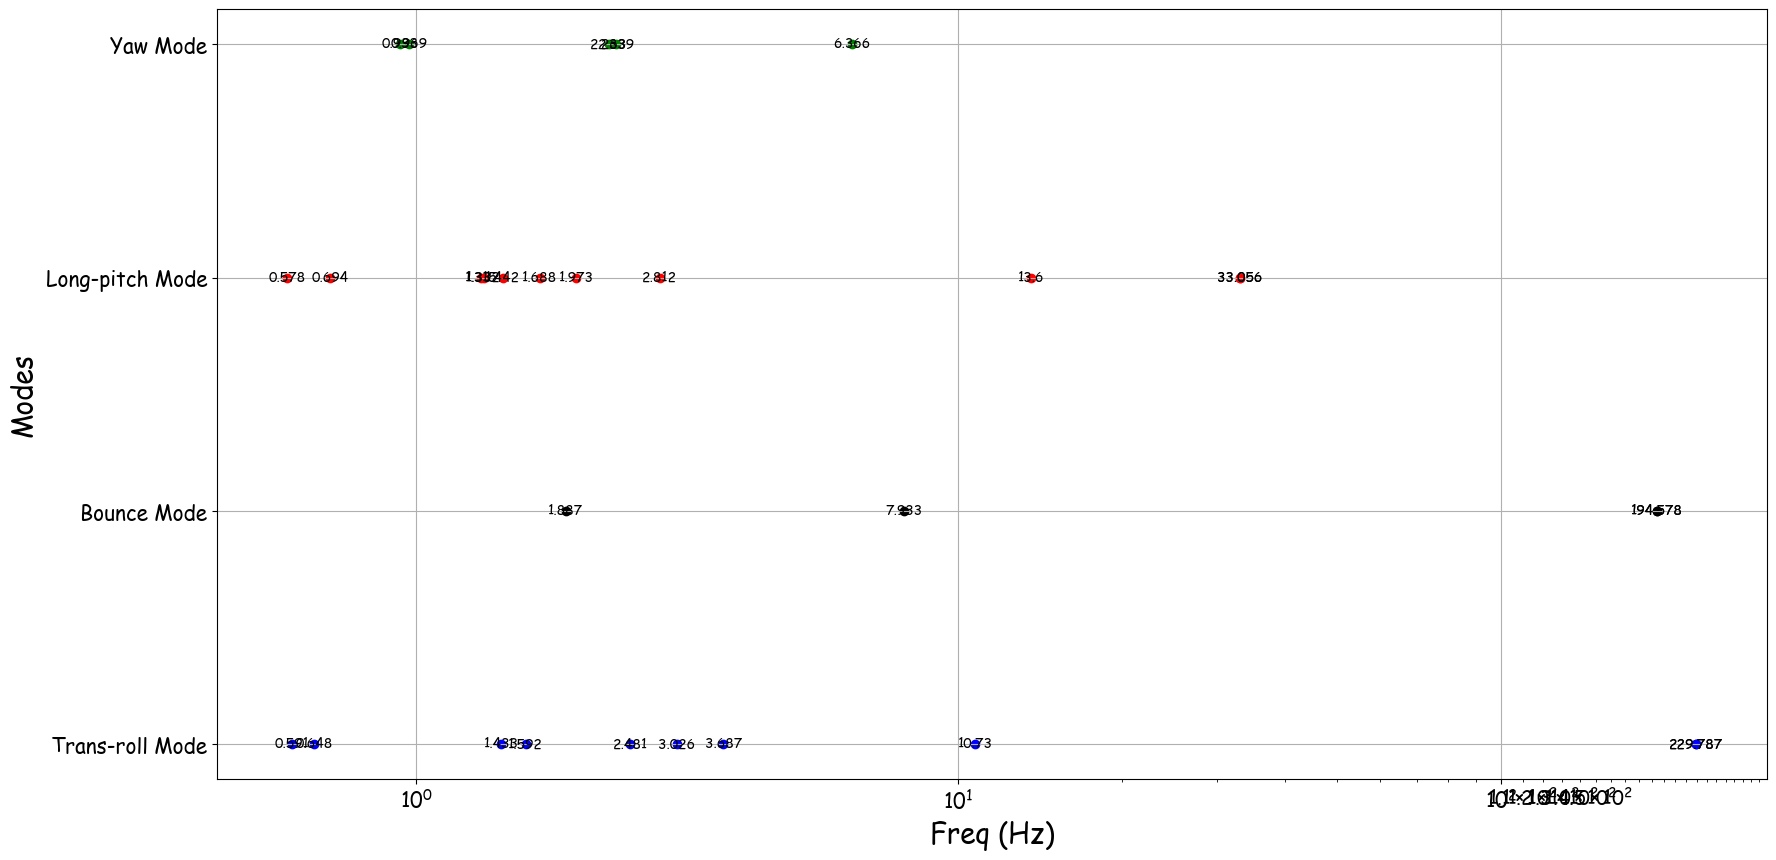

In [132]:
reboot_params()
pend = tpmodel.pendSS(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs]) # generating state space matrices 
modes = tpmodel.eigenmodes(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs]) 
fig, ax = plt.subplots(figsize = (20,10))
mode_forest(modes, fig, ax)
print_modes(modes)

# Increase MOI to 2x for the top mass 

,Freq,DOF,Amps,Mode_vis
0,229.785101,"[roll2I, roll2E, roll3I, roll3E]","[0.5, 0.5, -0.5, -0.5]","[None, None]"
1,229.785088,"[roll2I, roll2E, roll3I, roll3E]","[0.5, -0.5, -0.5, 0.5]","[None, None]"
2,194.577871,"[z2I, z2E, z3I, z3E, pitch1]","[0.5, -0.5, -0.5, 0.5, -0.01]","[None, None]"
3,194.577862,"[z2I, z2E, z3I, z3E]","[-0.5, -0.5, 0.5, 0.5]","[None, None]"
4,33.033764,"[pitch2I, pitch2E, pitch3I, pitch3E]","[-0.5, -0.5, 0.5, 0.5]","[None, None]"
5,33.033762,"[pitch2I, pitch2E, pitch3I, pitch3E]","[0.5, -0.5, -0.5, 0.5]","[None, None]"
6,9.919547,"[pitch1, z3I, z3E]","[1.0, -0.01, 0.01]","[None, None]"
7,8.279115,"[z1, z2I, z2E, z3I, z3E]","[-0.96, 0.14, 0.14, 0.14, 0.14]","[-6.86, -6.86]"
8,7.542701,"[roll1, roll3I, roll3E, roll2I, roll2E]","[-0.87, 0.25, 0.25, 0.24, 0.24]","[-3.48, -3.48]"
9,5.032430,"[yaw1, yaw2I, yaw2E, yaw3I, yaw3E]","[-0.98, 0.15, 0.15, -0.01, -0.01]","[98.0, 98.0]"


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: xlabel='Freq (Hz)', ylabel='Modes'>)

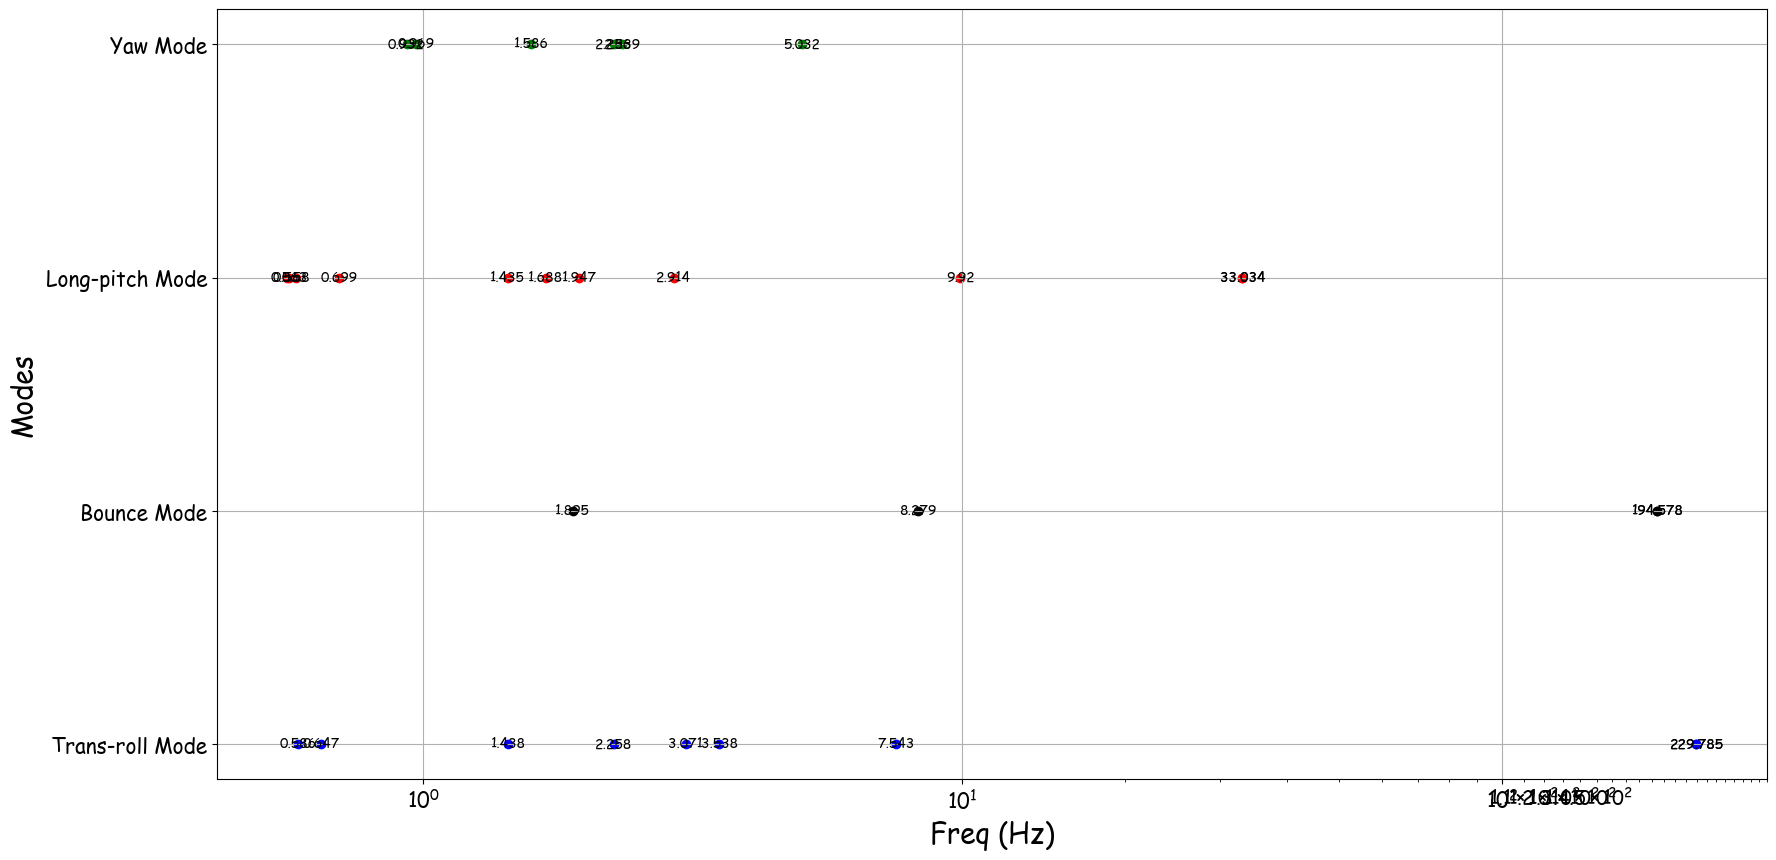

In [131]:
Case1 = pd.DataFrame(data={"Parameters":["I1x","I1y","I1z", "d0", "d2I", "d2E", "d3I","d3E", "d4I","d4E", "m1"], "Values":[0.00235,0.00173,0.00173,0.001,0,0,0,0,0,0,1]})
pend1, modes1 = changes(Case1)

# ax.set_ylabel("Modes", fontsize = 20)
# ax.set_xlabel("Freq (Hz)", fontsize = 20)
# ax.tick_params(axis = "both", labelsize = 15)
df = print_modes(modes1)

display(df)

fig, ax = plt.subplots(figsize = (20,10))
mode_forest(modes1, fig, ax)


0.405


# Common Mode Rejection

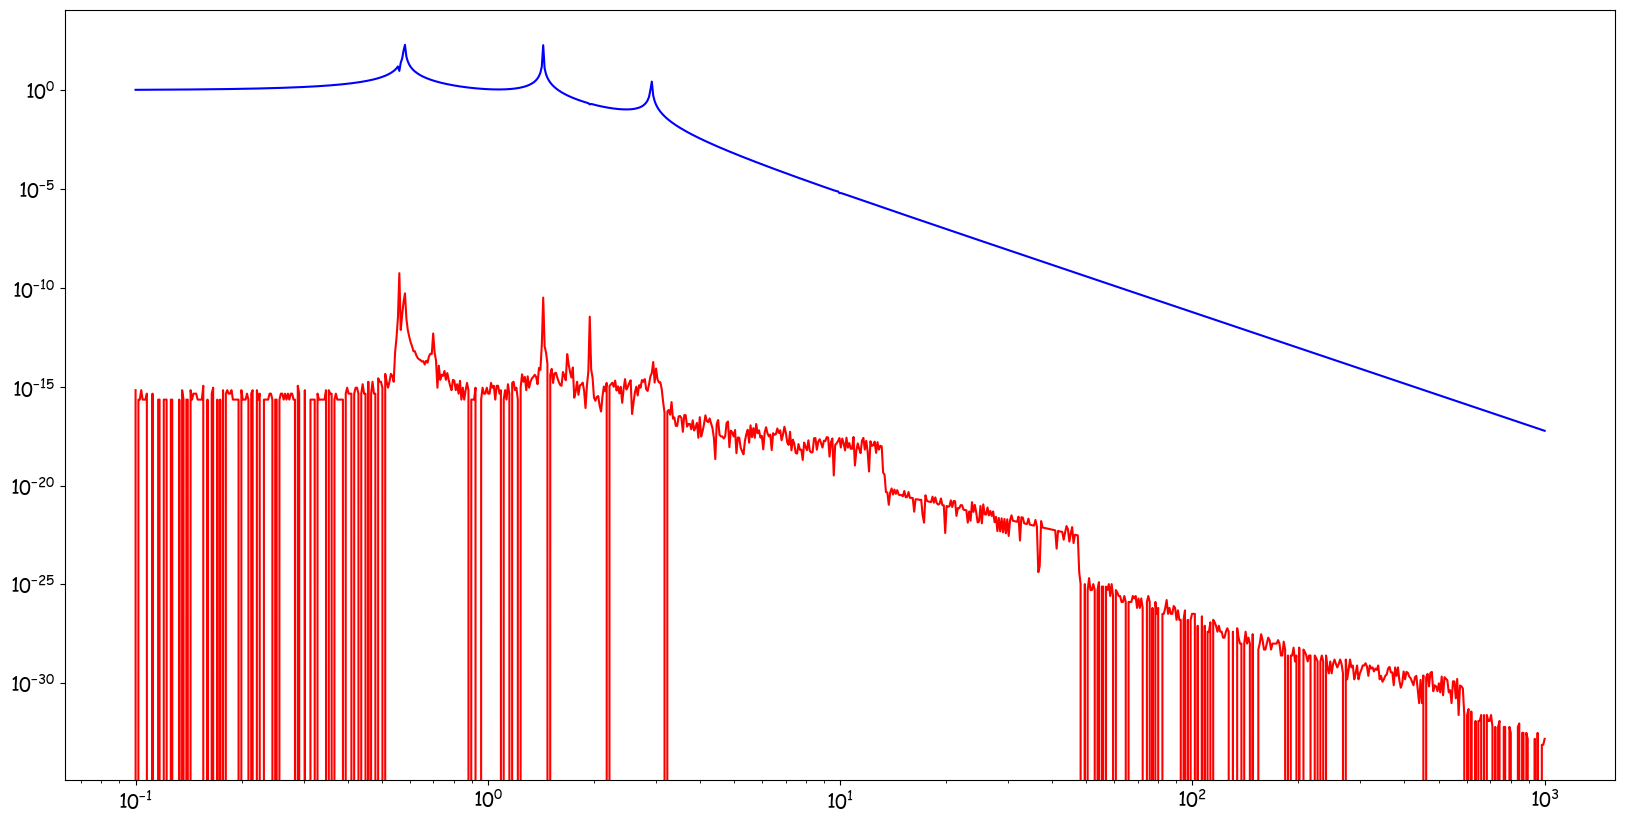

In [ ]:
tf_plat_optI = tpmodel.trimio(pend1,["x00"],["x3I"])

tf_plat_optE = tpmodel.trimio(pend1,["x00"],["x3E"])



mag_diff, _, omega = ct.frequency_response(tf_plat_optI-tf_plat_optE,omega_limits=[2*pi*0.1,2*pi*1000], Hz = False)
mag_optE, _, omega = ct.frequency_response(tf_plat_optE,omega_limits=[2*pi*0.1,2*pi*1000], Hz = False)
freq = np.array(omega)/(2*np.pi)
fig,ax= plt.subplots(figsize = (20,10))
# 0.1 in the denominator corresponds to 
# ax.loglog(freq,MirrorLong_CryoVert*1e-6*np.sqrt(2),"-b", label="Length Noise due to vertical Cryocooler noise")
ax.loglog(freq,mag_diff,"-r", label="Cav motion")
ax.loglog(freq,mag_optE,"-b", label="End mass motion")


'x3I'

In [ ]:
P = ct.tf(1, [1, 0], inputs='u', outputs='y')
C = ct.tf(10, [1, 1], inputs='e', outputs='u')
sumblk = ct.summing_junction(inputs=['r', '-y'], output='e')
T = ct.interconnect([P, C, sumblk], inputs='r', outputs='y')
print (T)

<LinearICSystem>: sys[142]
Inputs (1): ['r']
Outputs (1): ['y']
States (2): ['sys[137]_x[0]', 'sys[138]_x[0]']

A = [[ 0. 10.]
     [-1. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



In [163]:
print (P)

<TransferFunction>: sys[107]
Inputs (1): ['u']
Outputs (1): ['y']


1
-
s



In [169]:
# Assuming tf_plat_optI and tf_plat_optE are defined as transfer functions
# Replace trimio_tf(pend1, ["x00"], ["x3I"]) and trimio_tf(pend1, ["x00"], ["x3E"]) with the actual functions
tf_plat_optI = trimio_tf(pend1, ["x00"], ["x3I"])  # This is your main system
tf_plat_optE = trimio_tf(pend1, ["x00"], ["x3E"])  # This is the feedback transfer function

# Define the summing junction for the negative feedback
sumblk = ct.summing_junction(inputs=['r', '-y_fb'], output='e')

# Define the interconnection system with negative feedback
T_feedback = ct.interconnect(
    [tf_plat_optI, tf_plat_optE, sumblk],  # List of components
    inputs='r',                            # Input to the system is 'r'
    outputs='y',                           # Output of the system is 'y'
    connections=[
        ['tf_plat_optI.u', 'sumblk.e'],    # Connect the summing junction output to tf_plat_optI input
        ['tf_plat_optE.u', 'tf_plat_optI.y'], # Connect the output of tf_plat_optI to tf_plat_optE input
        ['sumblk.y_fb', 'tf_plat_optE.y']  # Feedback the output of tf_plat_optE to summing junction as '-y_fb'
    ]
)

# Print the resulting system properties
print("Number of inputs:", T_feedback.ninputs)
print("Number of outputs:", T_feedback.noutputs)
print("Number of states:", T_feedback.nstates)

ValueError: couldn't find system 'tf_plat_optI'

In [176]:
ct.ss2tf(pend1.A,pend1.B,pend1.C,pend1.D)

ControlMIMONotImplemented: Not implemented for MIMO systems without slycot.